<a href="https://colab.research.google.com/github/tasting-tea/desenvolvimento-time/blob/main/LS_Gamble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/fiftysevendegreesofrad/surveytest/main/test.csv",header=[0,1])

# stack
df=df.set_index(list(df.columns[0:3]))
df = df.stack(0).reset_index()

# rename first 4 columns to achieve single-level column names
cols = list(df.columns)
cols[0]="participant"
cols[1]="ls1"
cols[2]="ls2"
cols[3]="vignette"
df.columns=cols

for col in ["baseline ls","fail ls","pfail","success ls"]:
  df[col] = pd.to_numeric(df[col],errors="coerce")

# add columns giving the mean LS ratings for vignette on each row
groups = df.groupby("vignette").mean()
df = df.join(groups,on="vignette",rsuffix="_mean")
del df["ls1_mean"]
del df["ls2_mean"]
del df["participant_mean"]


In [ ]:
df

,participant,ls1,ls2,vignette,baseline ls,fail ls,pfail,success ls,baseline ls_mean,fail ls_mean,pfail_mean,success ls_mean,a,sigma_a
0,1,8,8,carrie,8.0,3.0,0.0100,10.0,7.142857,4.428571,0.604286,8.285714,16.355956,1.945983
1,1,8,8,john,4.0,2.0,0.0010,8.0,6.000000,4.071429,0.324443,7.857143,35.811286,3.998438
2,1,8,8,natalie,7.0,5.0,0.0200,10.0,4.833333,3.800000,0.304300,6.785714,37.852431,6.898918
3,1,8,8,vincent,3.0,2.0,0.0010,7.0,2.800000,2.357143,0.457300,5.285714,138.289445,26.671935
4,2,6,6,carrie,8.0,5.0,0.6000,9.0,7.142857,4.428571,0.604286,8.285714,79.613085,36.729875
5,2,6,6,john,6.0,6.0,0.4000,7.0,6.000000,4.071429,0.324443,7.857143,1.940461,2.419785
6,2,6,6,natalie,5.0,NaN,0.4000,3.0,4.833333,3.800000,0.304300,6.785714,7.387023,4.133024
7,2,6,6,vincent,NaN,3.0,0.6000,2.0,2.800000,2.357143,0.457300,5.285714,10.929869,8.652174
8,3,8,7,carrie,7.0,6.0,0.7000,7.0,7.142857,4.428571,0.604286,8.285714,81.176380,37.999872
9,3,8,7,john,6.0,5.0,0.6000,7.0,6.000000,4.071429,0.324443,7.857143,0.000000,1.847315


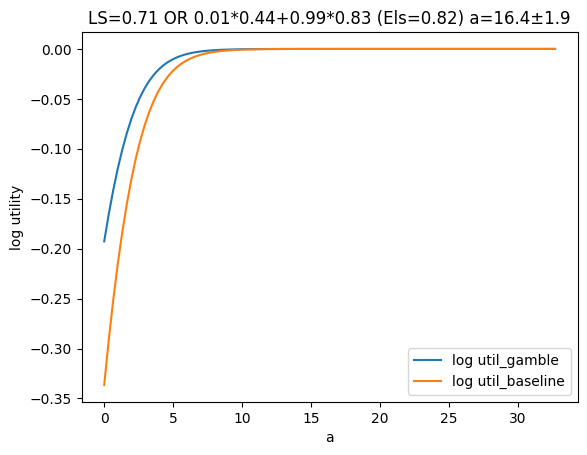

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


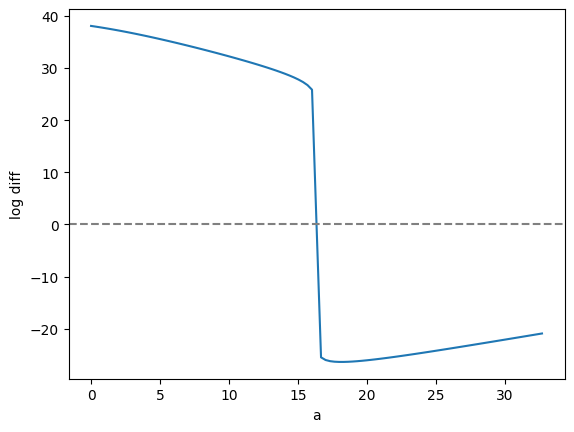

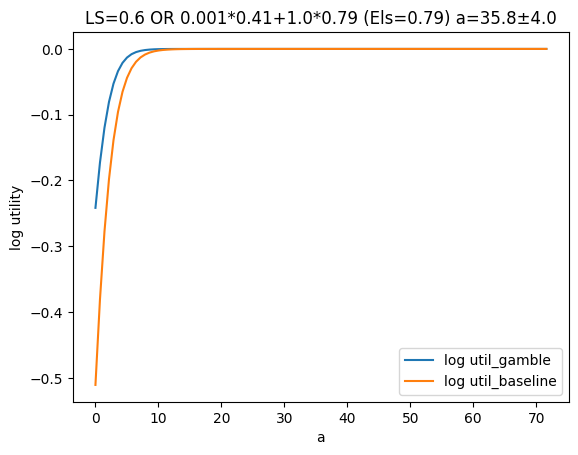

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


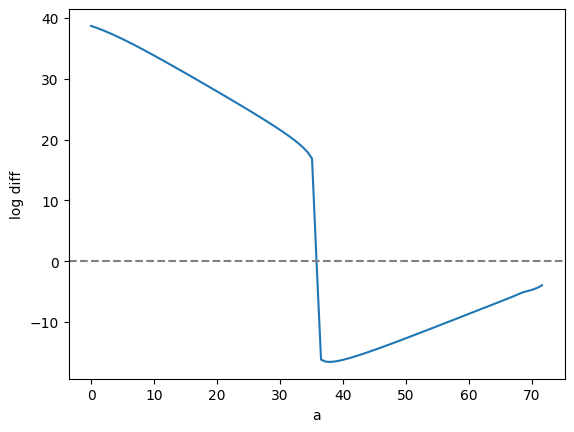

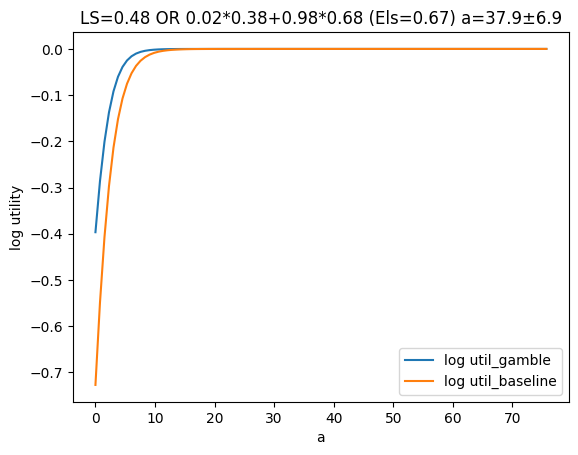

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


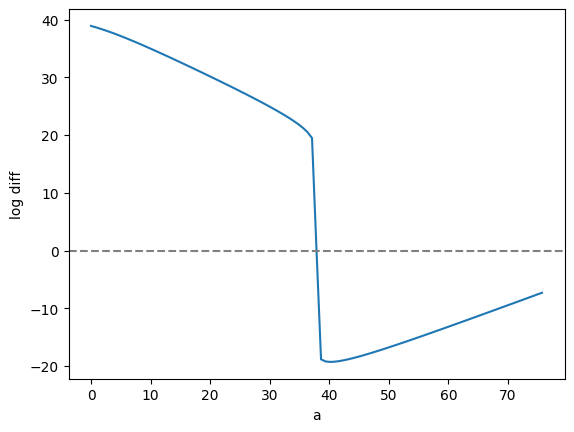

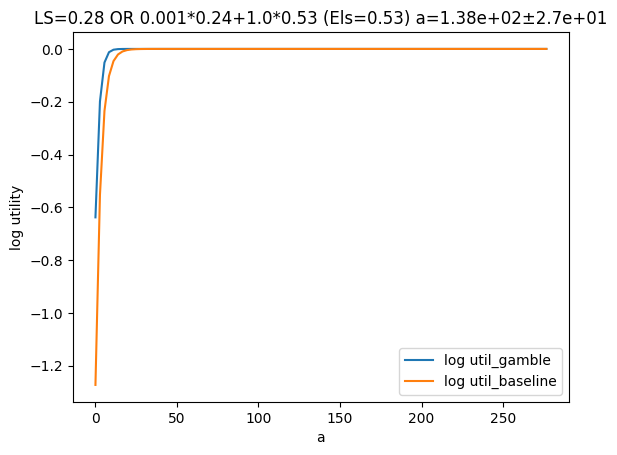

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


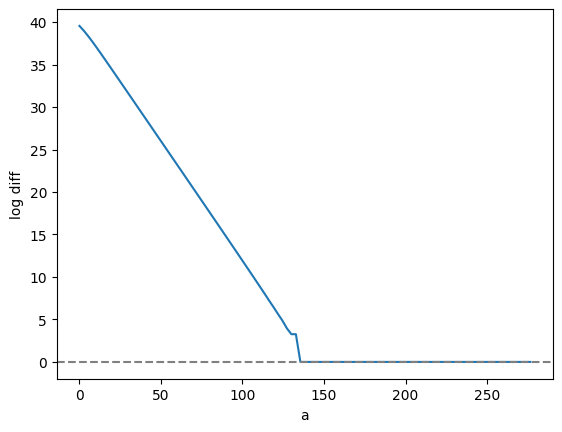

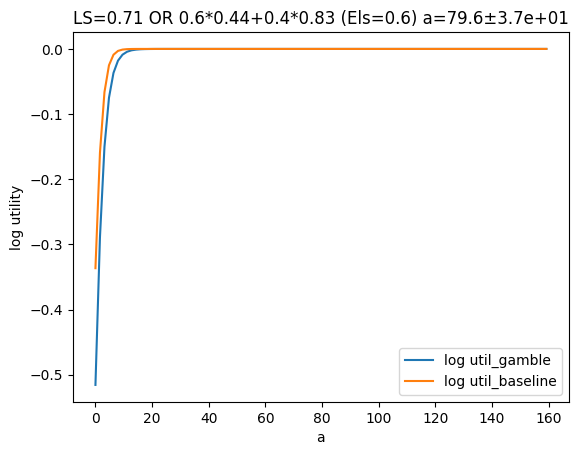

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


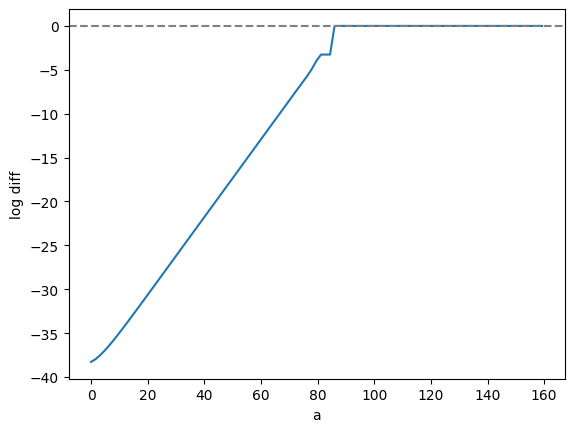

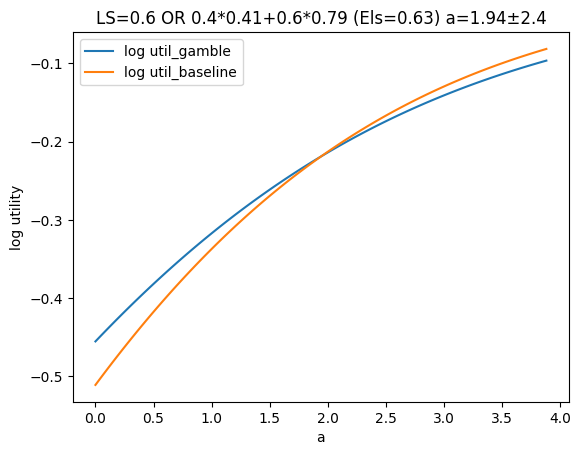

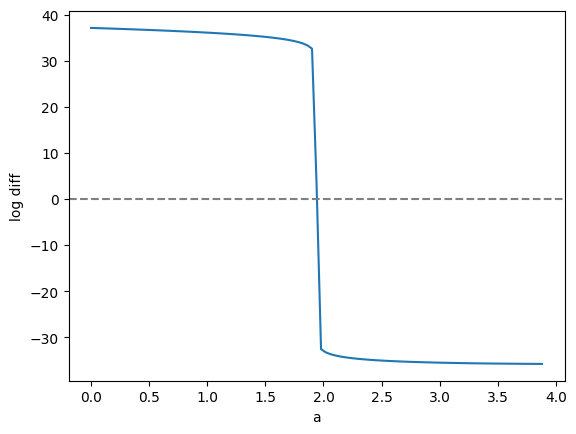

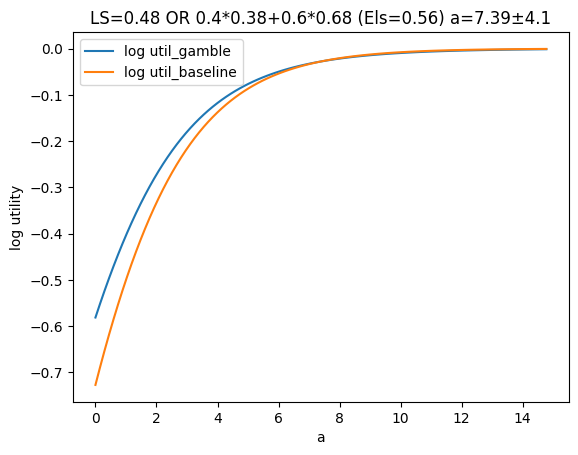

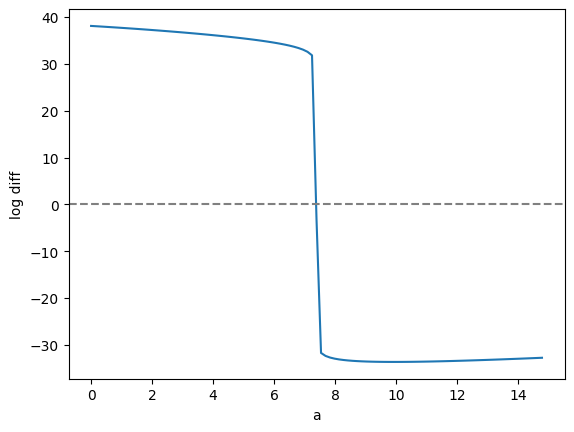

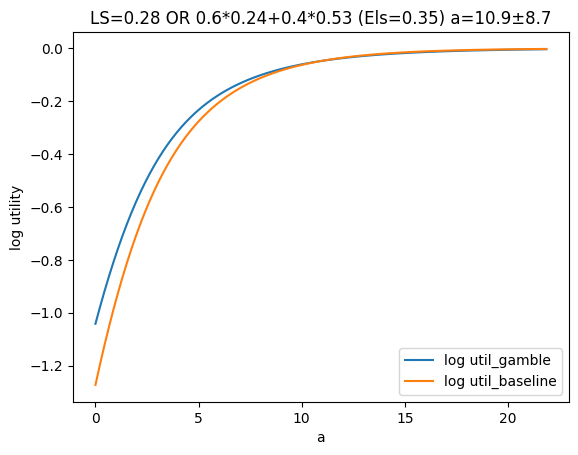

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


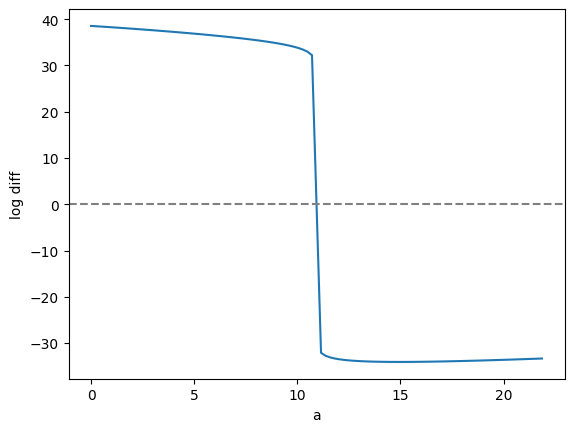

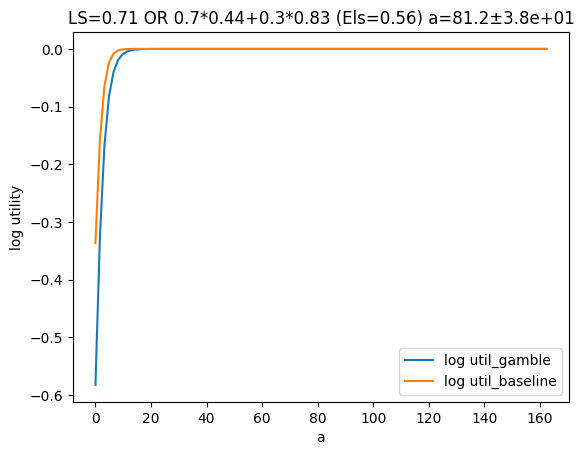

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


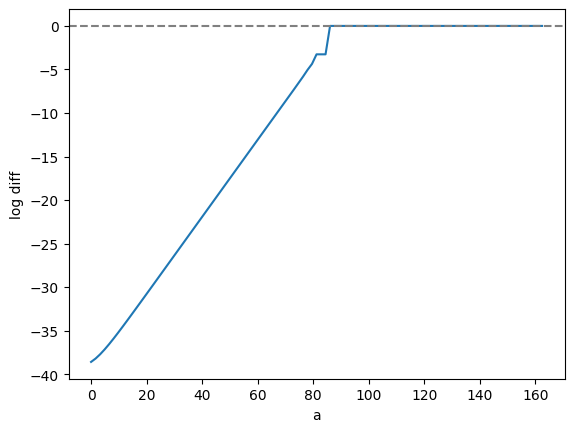

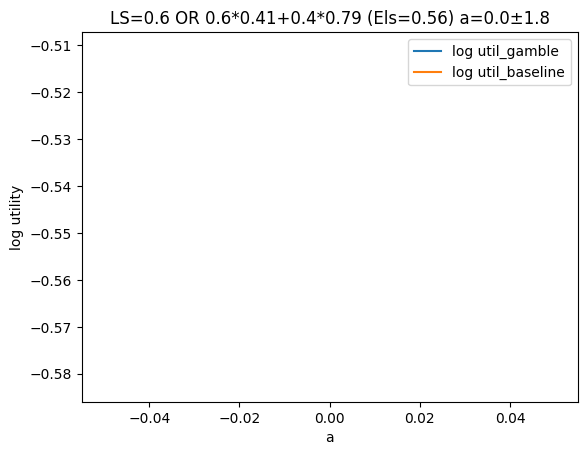

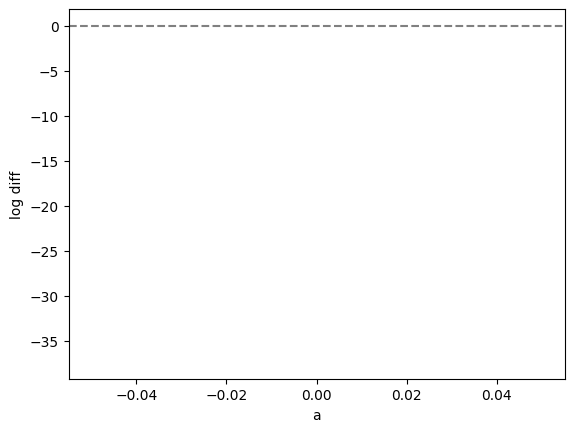

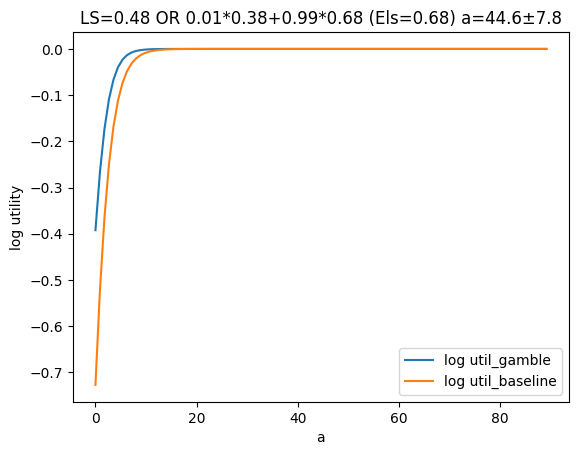

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


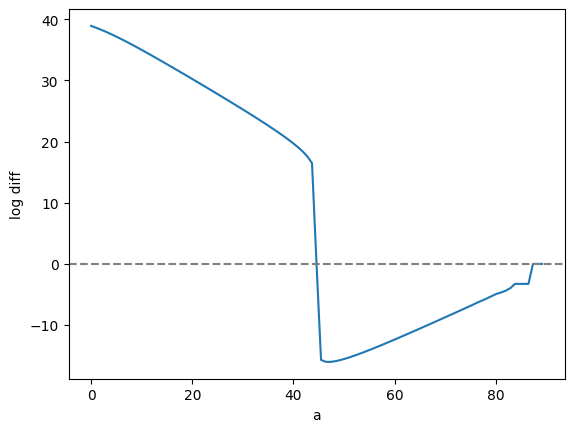

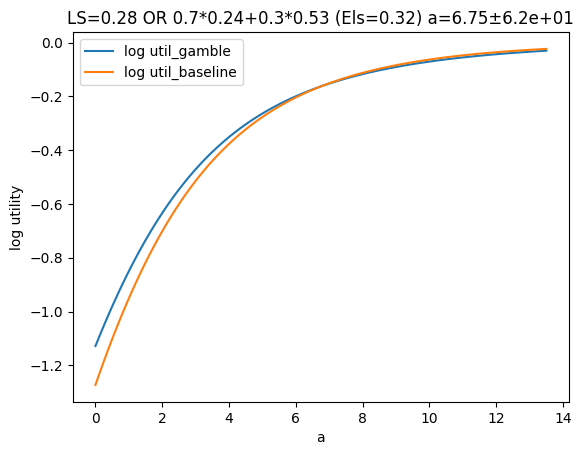

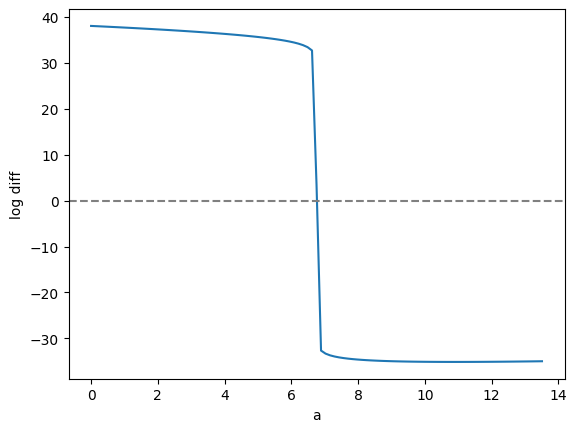

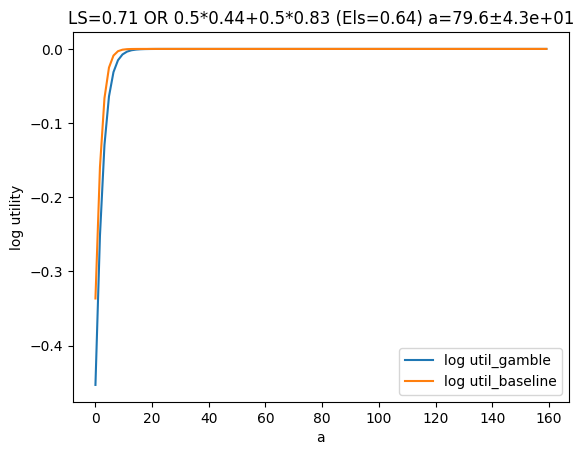

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


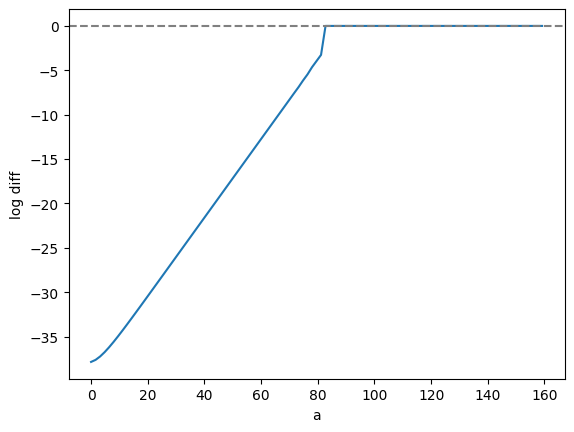

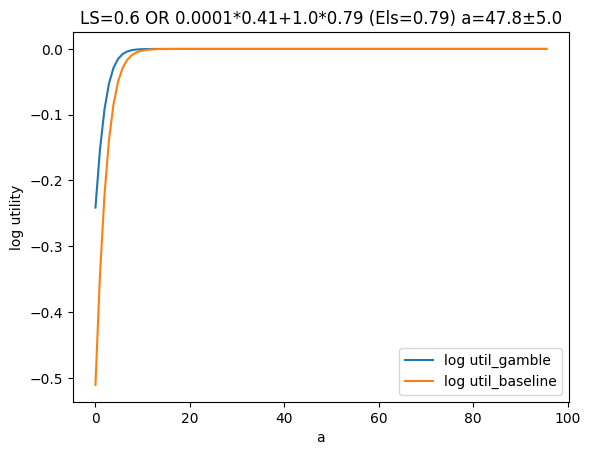

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


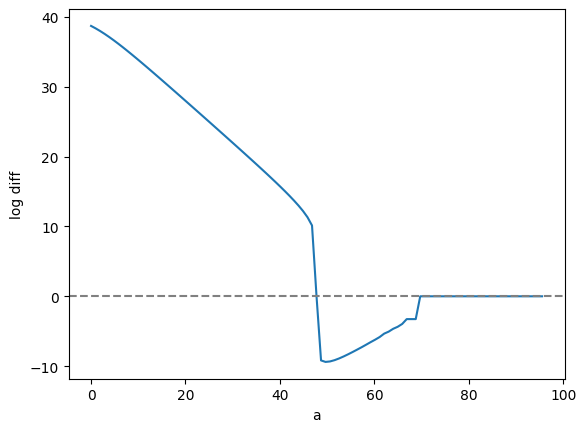

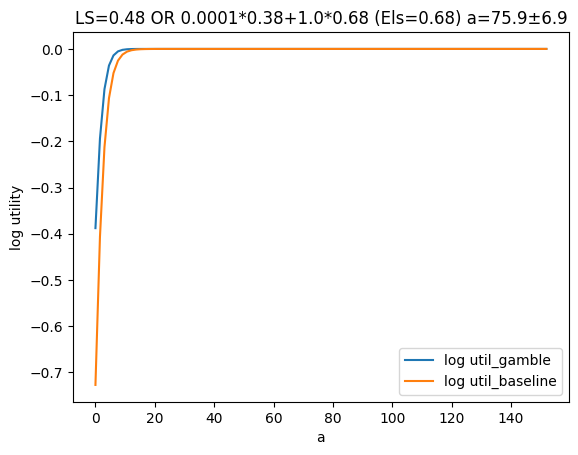

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


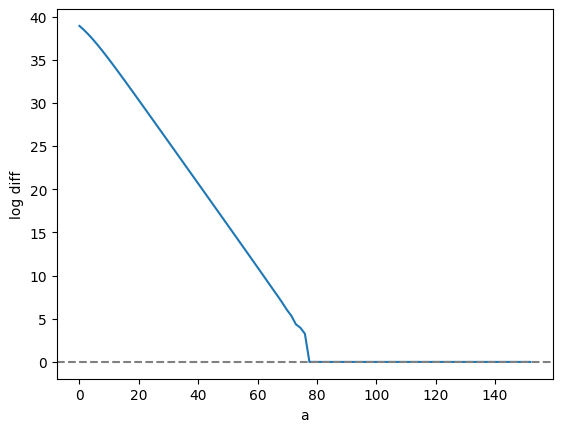

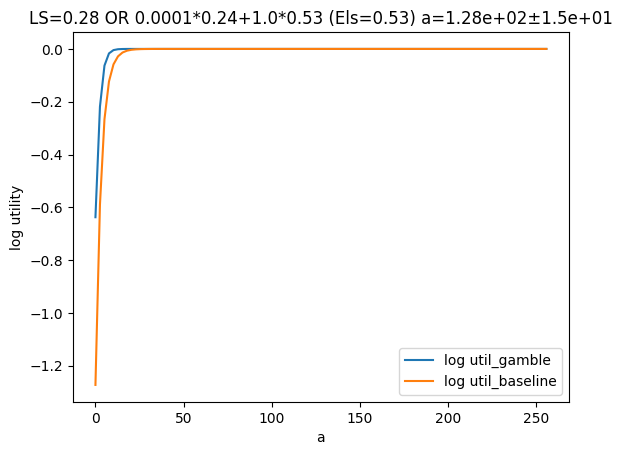

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


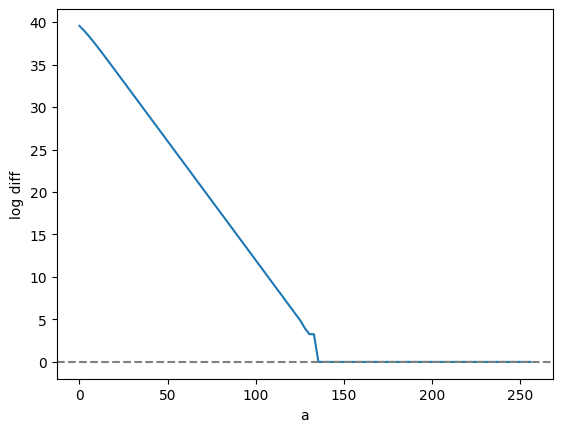

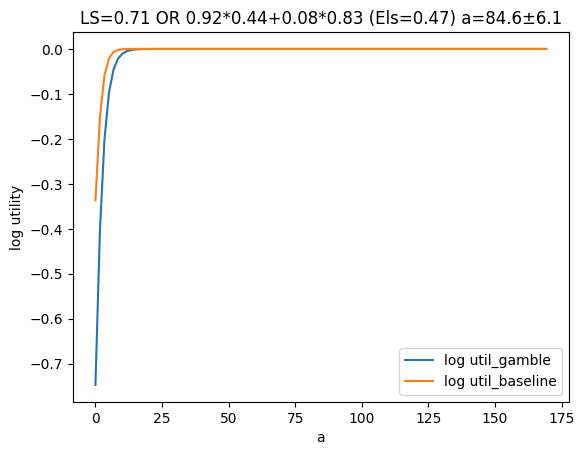

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


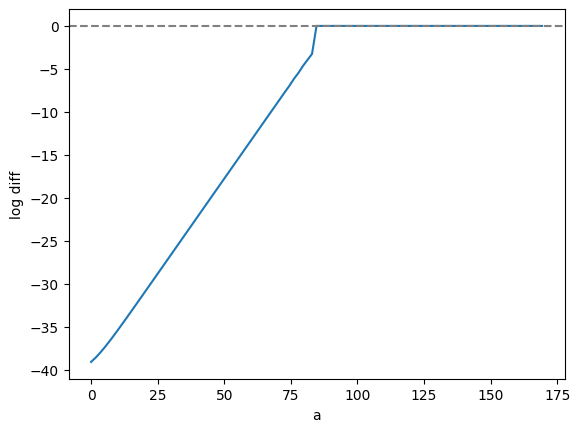

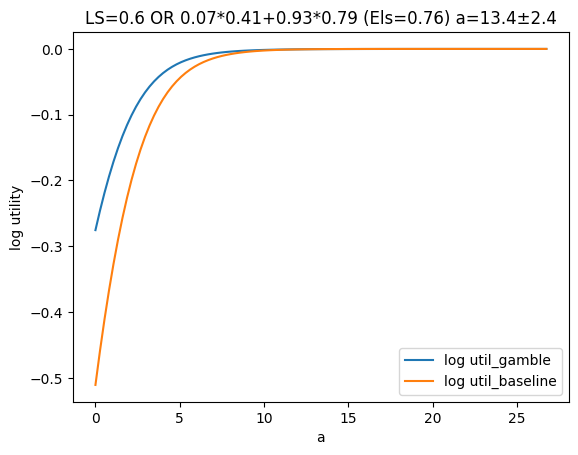

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


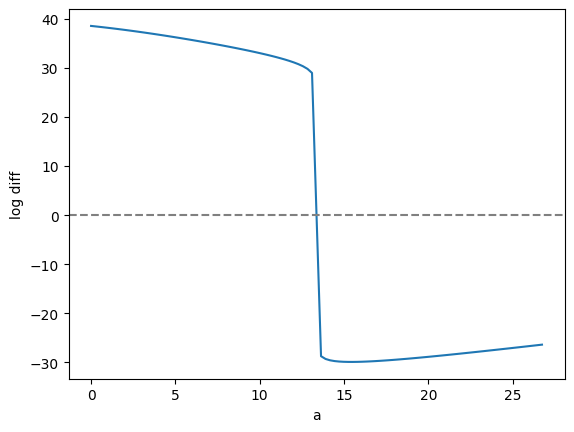

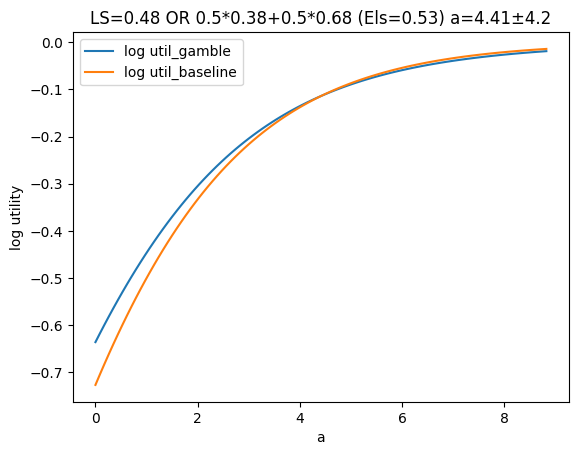

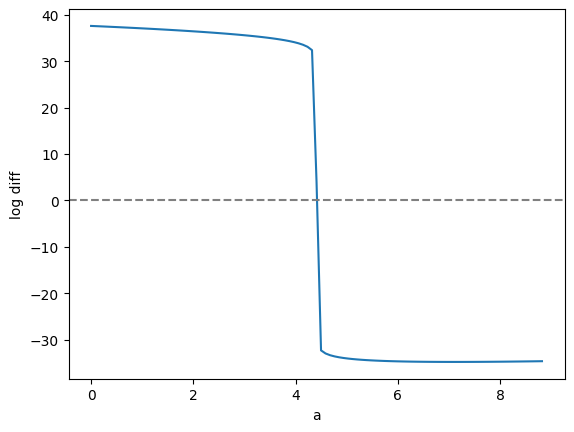

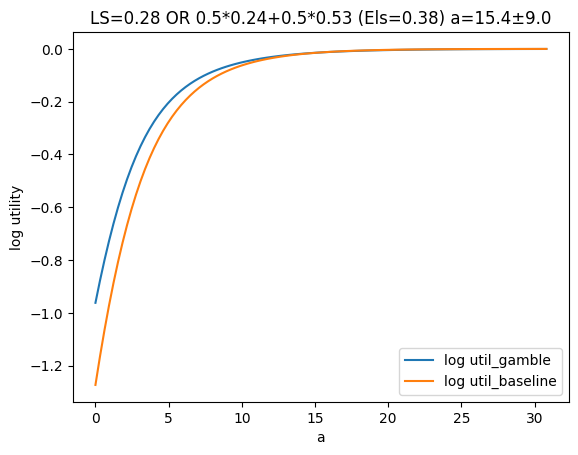

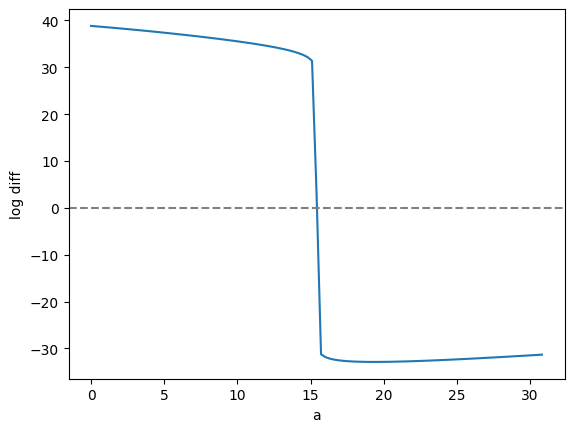

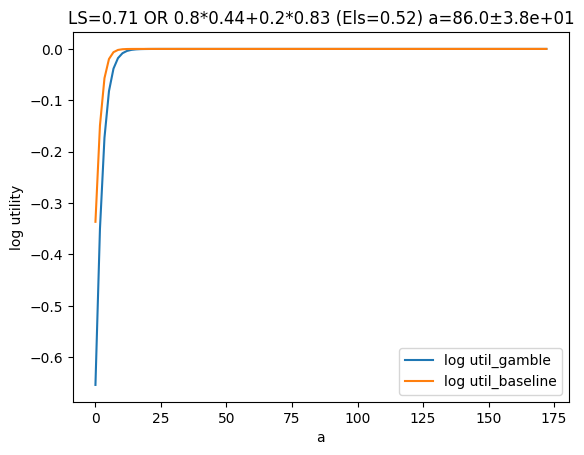

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


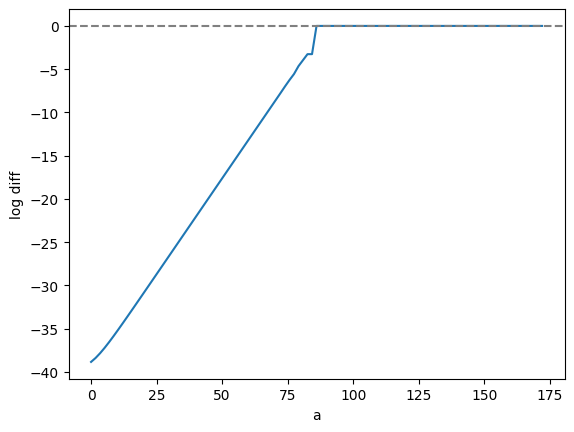

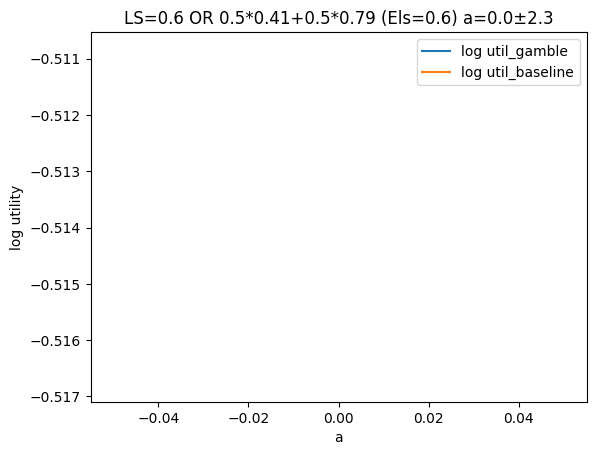

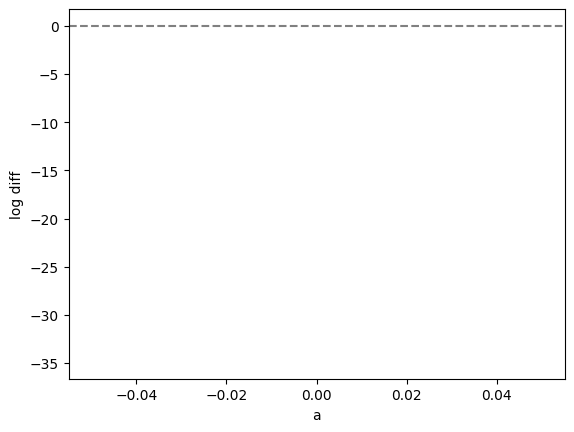

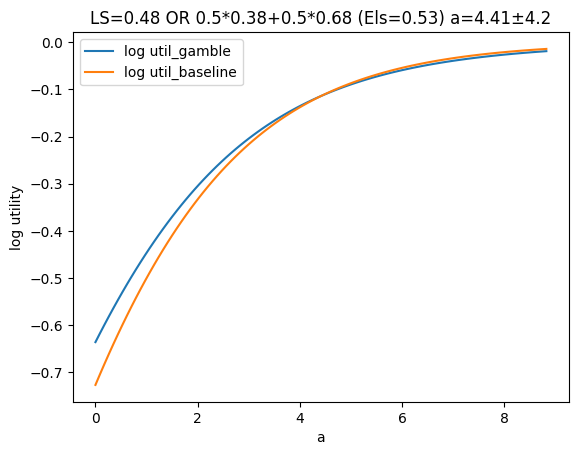

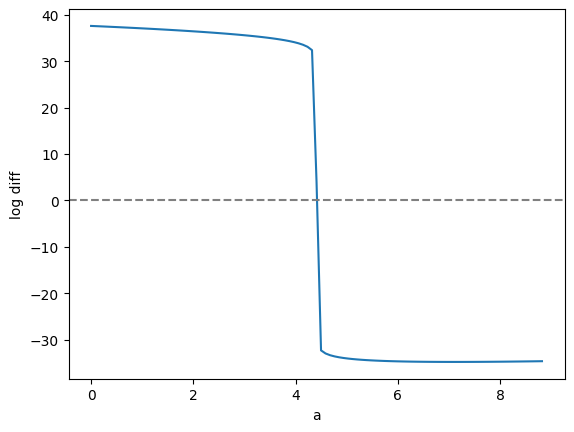

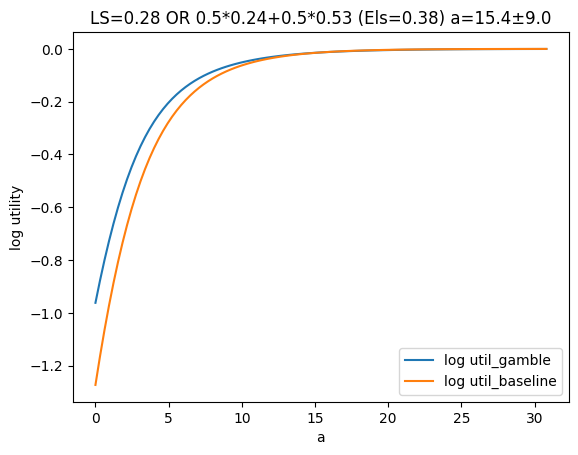

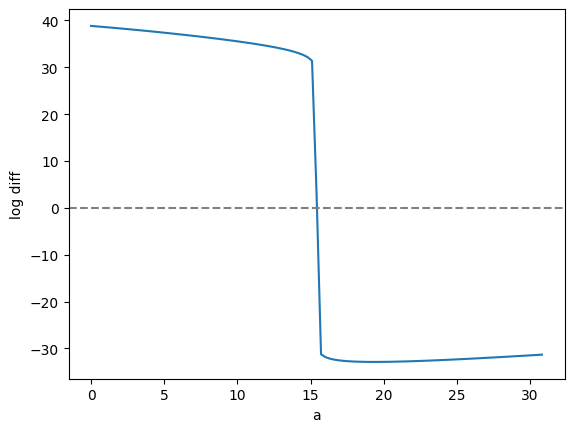

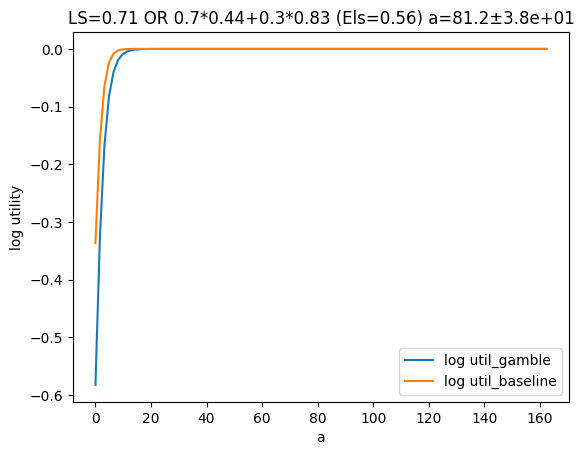

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


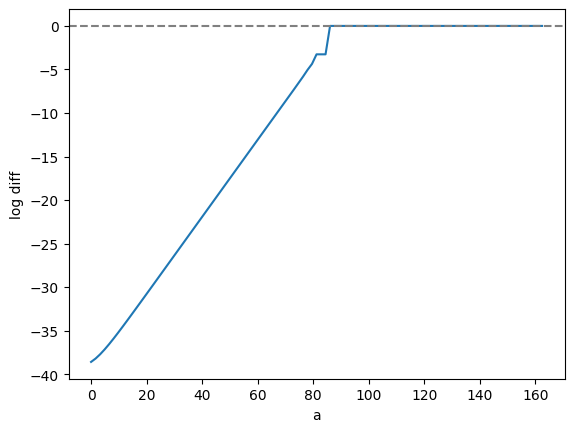

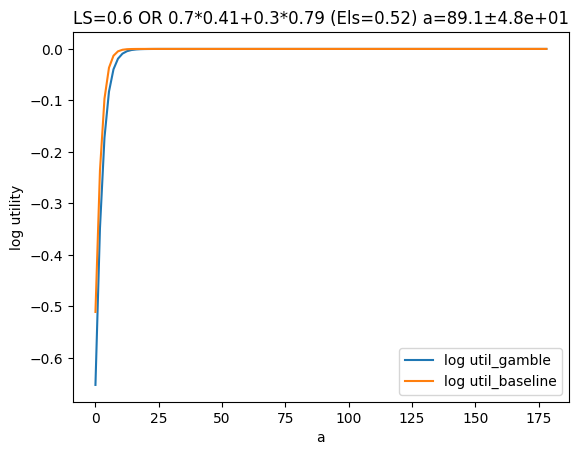

<ipython-input-26-07cde997c4e8>:11: RuntimeWarning: divide by zero encountered in log
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)


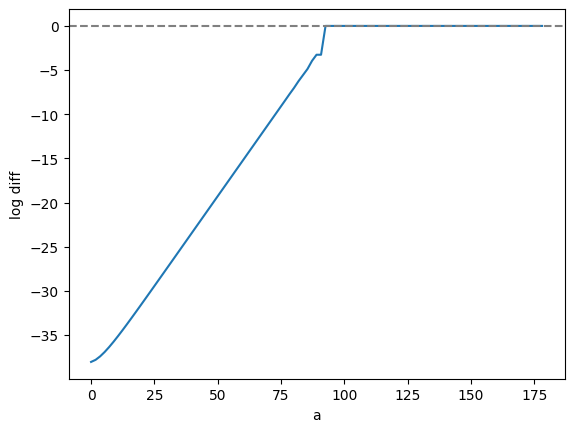

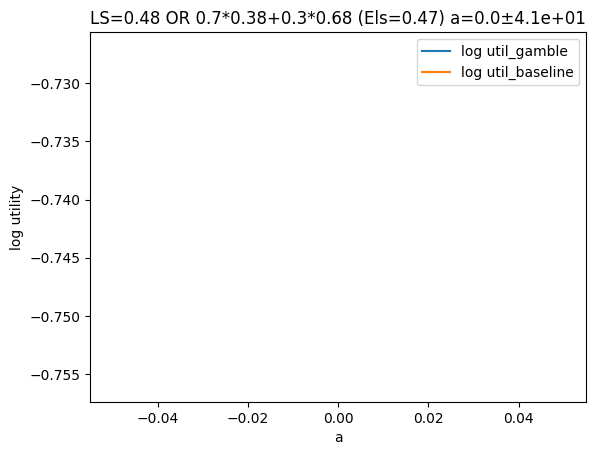

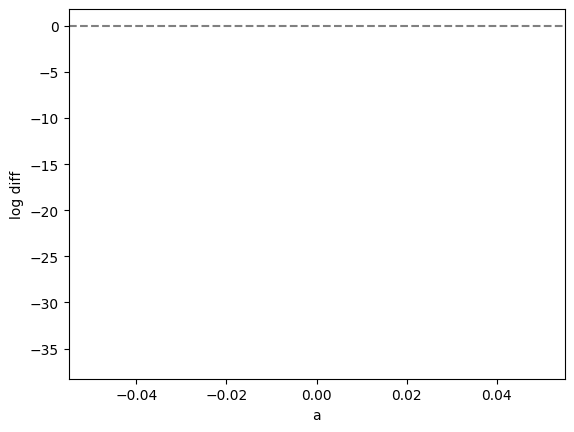

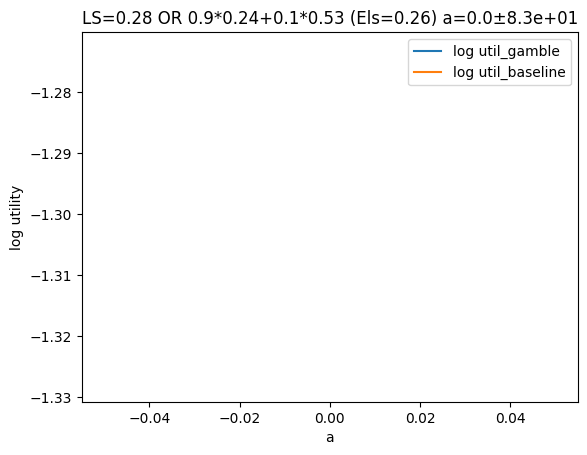

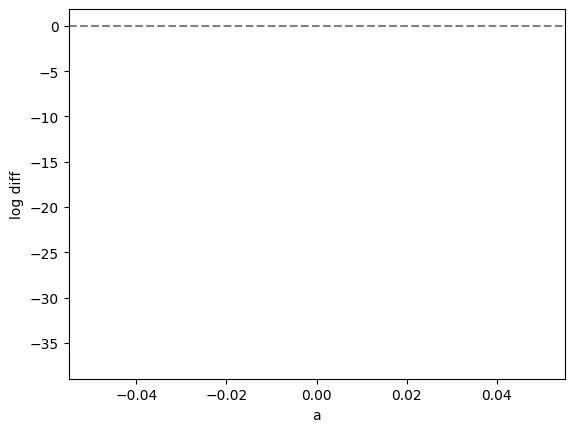

In [ ]:
def utility(ls,a):
  if a==0:
    return ls
  else:
    k=1/(-np.exp(-a)+1)
    return -k*np.exp(-a*ls)+k
  
utility = np.vectorize(utility)

def poslog(x):
  '''function for visualising any positive or negative number larger than e^-40'''
  return np.clip(np.log(np.abs(x))+40,0,None)*np.sign(x)

def compute_a(pf,lsb,lss,lsf):
    assert lsf<lsb
    assert lsb<lss

    def func_to_root(a):
      if a<0:
        a=0
      #return pf*utility(lsf,a)+(1-pf)*utility(lss,a) - utility(lsb,a) 
      # put another way: ug/ub = 1
      # log(ug)-log(ub)=0
      return np.log( ( pf*utility(lsf,a)+(1-pf)*utility(lss,a) ) ) - np.log( utility(lsb,a) )
    
    result,_,success,message = scipy.optimize.fsolve(func_to_root,0,full_output=True) 
    if success:
      return result[0]
    else:
      print(message)
      return np.nan

def compute_a_sigma(pf,lsb,lss,lsf):
  assert lss<1-.05
  assert lsf>.05
  main_result = compute_a(pf,lsb,lss,lsf)
  all_results = [compute_a(pf*.5,lsb,lss,lsf),
                 compute_a(pf,lsb,lss+.05,lsf),
                 compute_a(pf,lsb,lss,lsf-.05),
                 main_result]
  return main_result,np.std(all_results)

def get_a_from_gamble(row):
    gamble = row.to_dict()
    pf = gamble["pfail"]
    lsb = gamble["baseline ls_mean"]/10
    lss = gamble["success ls_mean"]/10
    lsf = gamble["fail ls_mean"]/10

    a,sigma_a = compute_a_sigma(pf,lsb,lss,lsf)


    '''I'm drawing some graphs so i can manually sense check whether these converged or not.
    It looks like for now we're no longer trying to compute 'a' anyway,
    but if we did, you might want to add some code to check that func_to_root really does cross the axis between, say, 0.99*a and 1.01*a
    Maybe worth a look at a scientific numerical methods textbook if we come back to this approach.
    '''
    As = np.linspace(0,a*2,101)
    
    log_util_gamble = np.log((pf*utility(lsf,As)+(1-pf)*utility(lss,As)))
    log_util_baseline = np.log((utility(lsb,As)))
    plt.plot(As,log_util_gamble,label="log util_gamble")
    plt.plot(As,log_util_baseline,label="log util_baseline")
    plt.xlabel("a")
    plt.ylabel("log utility")
    plt.legend()
    elsg = pf*lsf+(1-pf)*lss
    
    plt.title(f"LS={lsb:.2} OR {pf:.2}*{lsf:.2}+{(1-pf):.2}*{lss:.2} (Els={elsg:.2}) a={a:.3}±{sigma_a:.2}")
    plt.show()
    
    log_diff = log_util_gamble-log_util_baseline
    plt.plot(As,poslog(log_diff),label="poslogdiff")
    plt.xlabel("a")
    plt.ylabel("log diff")
    plt.axhline(y=0,linestyle="--",color="grey")
    plt.title("")
    plt.show()

    row["a"] = a
    row["sigma_a"] = sigma_a
    return row

#get_a_from_gamble(df.loc[0])
df=df.apply(get_a_from_gamble,axis=1)
#df

In [ ]:
def test_not_negative_expected_utility(row):
    '''assuming a=0'''
    gamble = row.to_dict()
    pf = gamble["pfail"]
    lsb = gamble["baseline ls_mean"]/10
    lss = gamble["success ls_mean"]/10
    lsf = gamble["fail ls_mean"]/10

    expected_util = pf*lsf+(1-pf)*lss - lsb
    if expected_util<0:
      print("e(u)<0 for mean LS ratings",gamble)

    lsb = gamble["baseline ls"]/10
    lss = gamble["success ls"]/10
    lsf = gamble["fail ls"]/10
    
    expected_util = pf*lsf+(1-pf)*lss - lsb
    if expected_util<0:
      print("e(u)<0 for own LS ratings:",gamble)
    
_=df.apply(test_not_negative_expected_utility,axis=1)


e(u)<0 for mean LS ratings {'participant': 2, 'ls1': 6, 'ls2': 6, 'vignette': 'carrie', 'baseline ls': 8.0, 'fail ls': 5.0, 'pfail': 0.6, 'success ls': 9.0, 'baseline ls_mean': 7.142857142857143, 'fail ls_mean': 4.428571428571429, 'pfail_mean': 0.6042857142857143, 'success ls_mean': 8.285714285714286, 'a': 79.6130851948399, 'sigma_a': 36.729874547825915}
e(u)<0 for own LS ratings: {'participant': 2, 'ls1': 6, 'ls2': 6, 'vignette': 'carrie', 'baseline ls': 8.0, 'fail ls': 5.0, 'pfail': 0.6, 'success ls': 9.0, 'baseline ls_mean': 7.142857142857143, 'fail ls_mean': 4.428571428571429, 'pfail_mean': 0.6042857142857143, 'success ls_mean': 8.285714285714286, 'a': 79.6130851948399, 'sigma_a': 36.729874547825915}
e(u)<0 for mean LS ratings {'participant': 3, 'ls1': 8, 'ls2': 7, 'vignette': 'carrie', 'baseline ls': 7.0, 'fail ls': 6.0, 'pfail': 0.7, 'success ls': 7.0, 'baseline ls_mean': 7.142857142857143, 'fail ls_mean': 4.428571428571429, 'pfail_mean': 0.6042857142857143, 'success ls_mean': 8.

{'carrie': 'red', 'john': 'green', 'natalie': 'blue', 'vincent': 'black'}

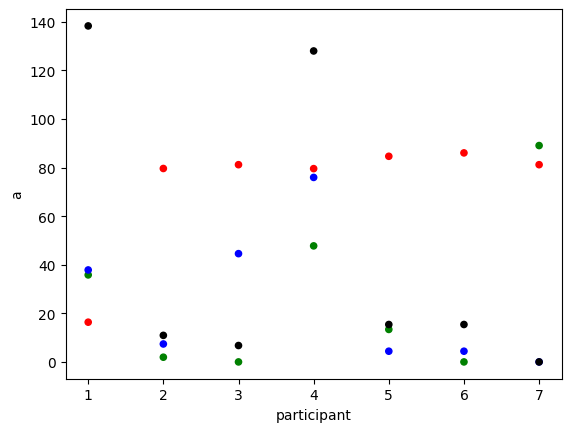

In [ ]:
vignettes = df["vignette"].unique()
vignette_to_colour = {v:c for v,c in zip(vignettes,["red","green","blue","black"])}
colours = df.apply(lambda row: vignette_to_colour[row["vignette"]],axis=1)
df.plot.scatter("participant","a",c=colours)
vignette_to_colour

<Axes: xlabel='participant,vignette'>

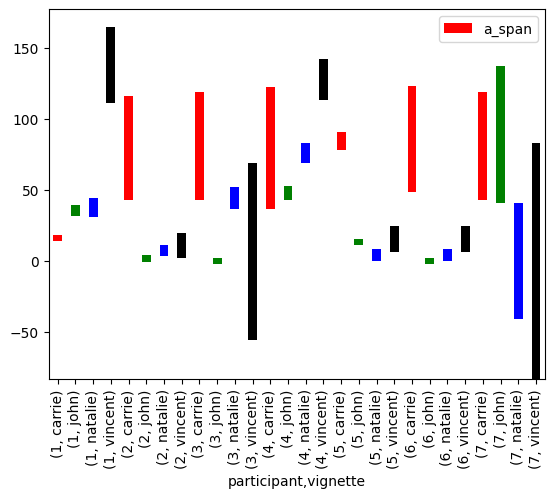

In [ ]:
df1=df.set_index(["participant","vignette"])
df1['a_lower']=df1['a']-df1['sigma_a']
df1['a_span']=2*df1['sigma_a']
vignette_to_colour = {v:c for v,c in zip(vignettes,["red","green","blue","black"])}
colours = df1.reset_index().apply(lambda row: vignette_to_colour[row["vignette"]],axis=1)
df1.plot.bar(y='a_span',bottom=df1['a_lower'],use_index=True,color=colours)

<Axes: title={'center': 'a'}, xlabel='vignette'>

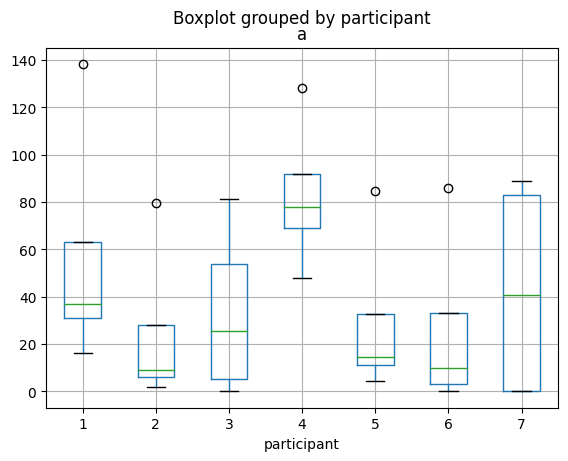

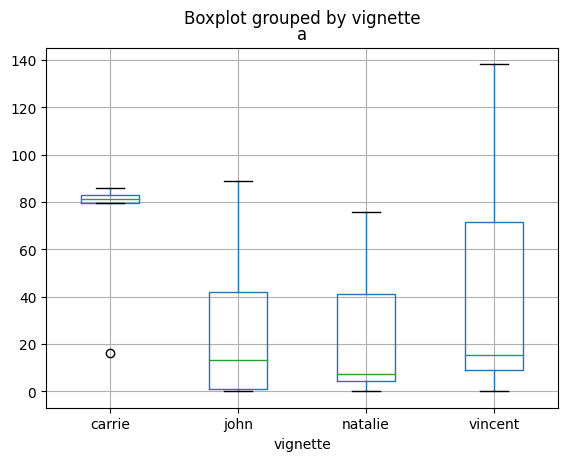

In [ ]:
df.boxplot("a",by="participant")
df.boxplot("a",by="vignette")



<Axes: xlabel='pfail', ylabel='sigma_a'>

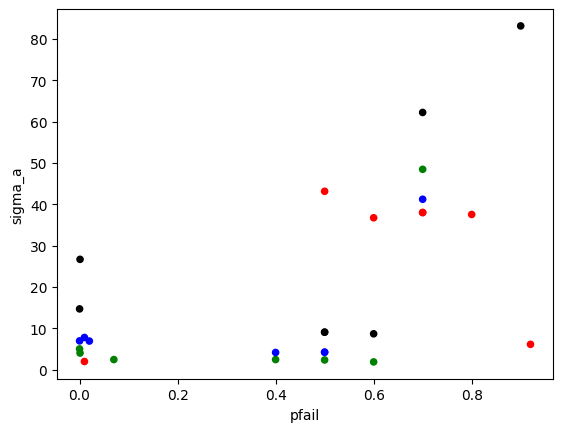

In [ ]:
df.plot.scatter("pfail","sigma_a",c=df.apply(lambda row: vignette_to_colour[row["vignette"]],axis=1))

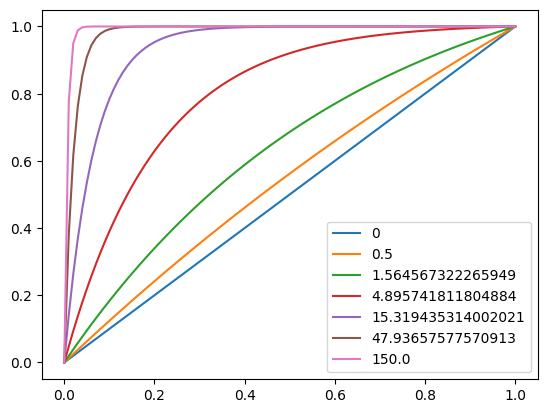

In [ ]:
xs = np.linspace(0,1,101)
def u(x,a):
  if a==0:
    return x
  else:
    return -np.exp(-a*x)
u = np.vectorize(u)

for a in [0]+list(np.geomspace(.5,150,6)):
  ys = u(xs,a)
  ys -= ys.min()
  ys /= ys.max()
  plt.plot(xs,ys,label=f"{a}")
plt.legend()
plt.show()





array([[<Axes: title={'center': 'baseline ls'}, xlabel='vignette'>,
        <Axes: title={'center': 'success ls'}, xlabel='vignette'>],
       [<Axes: title={'center': 'fail ls'}, xlabel='vignette'>,
        <Axes: title={'center': 'log pfail'}, xlabel='vignette'>]],
      dtype=object)

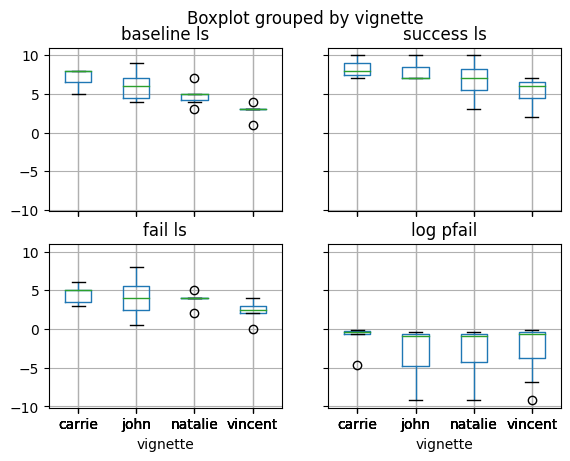

In [ ]:
df["log pfail"] = np.log(df["pfail"])
df.boxplot(["baseline ls","success ls","fail ls","log pfail"],by="vignette")